# KoNLPy, MeCab클래스 활용 (우분투)

```python
# 1) 우분투 환경에서 커널을 열어 jdk를 먼저 설치해줍시다.
$ sudo apt-get install g++ openjdk-8-jdk
# 2) 설치가 완료되었다면 curl을 이용해 mecab을 다운받아 실행시켜 줍니다.
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# 3) 그리고 마지막으로 konlpy를 설치해 줍니다.
$ pip install konlpy
```

In [1]:
# 설치가 완료된 후엔 아주 간편하게 import 하여 형태소 분석기를 사용하실 수 있습니다.
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 데이터 다운로드 및 분석

``` python
$ wget https://github.com/jungyeul/korean-parallel-corpora/blob/master/korean-english-news-v1/korean-english-park.train.tar.gz
$ mkdir -p ~/aiffel/sp_tokenizer/data
$ mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
$ cd ~/aiffel/sp_tokenizer/data
$ tar -xzvf korean-english-park.train.tar.gz
```

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


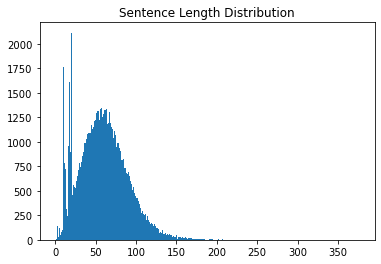

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # # 문장내 단어의 개수가 1500을 초과하는 인덱스를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)
# 중복 데이터가 많음을 확인할 수 있다.

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


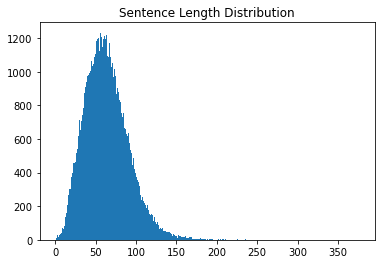

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

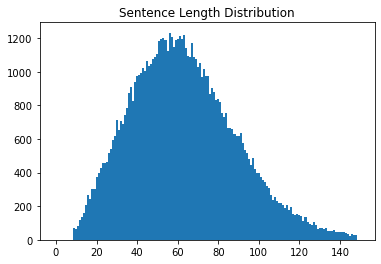

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 공백 기반 토큰화

In [10]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
split_corpus = []
for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


- 3번 단어인 밝혔다. 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류되겠죠? 이 때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가로 이어집니다.
- 만일 밝 + 혔다 라고 토큰화했다면 어땠을까요? 밝 + 히다, 밝 + 다 같은 구절이 등장했을 때, 공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월해지겠죠? 동시에 단어 사전도 효율적으로 축소될 것입니다. 이를 위해 형태소 분석기가 존재합니다!
- 한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 사용됩니다. 이번 코스에서는 KoNLPy, 그 중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

# 형태소 기반 토큰화

In [14]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    # 코드를 작성하세요
    mecab_corpus.append(mecab_split(kor))

In [15]:
mecab_corpus[0]

['그러나',
 '그',
 '는',
 '앞',
 '으로',
 '18',
 '개월',
 '안',
 '에',
 '도시',
 '중심부',
 '에',
 '만',
 '7000',
 '명',
 '의',
 '사람',
 '들',
 '이',
 '거주',
 '할',
 '것',
 '으로',
 '추정',
 '하',
 '고',
 '있',
 '다',
 '.']

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


 공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인하셨을 겁니다

### Decoding

In [17]:
# Case 1 : tokenizer.sequences_to_texts()
mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

['경찰 은 레기 오 에밀리아 가 본 거지 인 다른 테러 조직 은 대 이슬람 제국 설립 을 목표 로 모로코 에서 중국 까지 세력 을 확장 하 고 있 었 다고 말 했 다 .']

In [18]:
# Case 2 : tokenizer.index_word
text = ""
for i in mecab_tensor[100]:
  if i == 0: continue
  text = text + mecab_tokenizer.index_word[i] + " "
  
text

'경찰 은 레기 오 에밀리아 가 본 거지 인 다른 테러 조직 은 대 이슬람 제국 설립 을 목표 로 모로코 에서 중국 까지 세력 을 확장 하 고 있 었 다고 말 했 다 . '

# SentencePiece
SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다.

[google/sentencepiece](https://github.com/google/sentencepiece)

```python
$ pip install sentencepiece
```


## SentencePiece 모델 학습

In [10]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 aiffel0035 aiffel0035 376901 11월  9 17:27 korean_spm.model
-rw-r--r-- 1 aiffel0035 aiffel0035 146388 11월  9 17:27 korean_spm.vocab


In [11]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## Tokenizer 함수 작성
> 1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.<br/> 2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.<br/> 3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [12]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [13]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)


[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


# 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기

- 네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기

- 학습된 모델로 sp_tokenize() 메소드 구현하기

- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기

- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기

- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성늘 개선 여부 확인하기

## Step 1. 데이터 준비

### 데이터 로드
``` 
$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
$ mv ratings_*.txt ~/aiffel/sentiment_classification
```

In [14]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [15]:
# 결측값 제거
print(train_data.shape)
refined_train_data = train_data.dropna(axis=0)
print(refined_train_data)

(150000, 3)
              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[149995 rows x 3 columns]


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 56


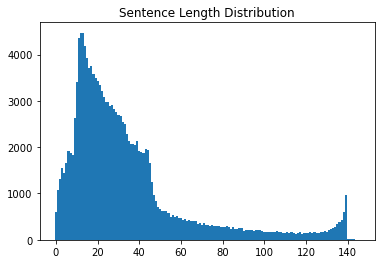

In [16]:
min_len = 999
max_len = 0
sum_len = 0

for sen in refined_train_data['document']:        
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in refined_train_data['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [17]:
# 중복값 제거
print(refined_train_data.shape)
refined_train_data.drop_duplicates("document", keep="first")
print(refined_train_data.shape)

(149995, 3)
(149995, 3)


In [18]:
check_sentence_with_length(refined_train_data['document'],1)

아
잼
1
4
4
굿
짱
휴
.
1
굿
음
?
?
ㅎ
굿
ㅋ
굿
즐
♥
굳
ㅋ
네
ㅎ
ㅋ
굿
ㅇ
k
.
굿
굿
굳
ㅠ
?
1
ㅋ
굿
쒯
굿
굿
굳
♬
굿
토
ㅋ
ㅋ
굿
ㅋ
굿
O
똥
ㅎ
.
굿
ㅎ
짱
굳
굿
굿
짱
?
z
굿
짱
음
굳
ㅇ
헐
굳
굳
굿
굿
굿
삼
꽝
굿
굿
굿
굿
ㅎ
굳
굿
4
!
?
ㅎ
1
굳
.
ㅎ
풉
아
굿
똥
ㅅ
왜
ㄴ
굳
쉣
봐
z


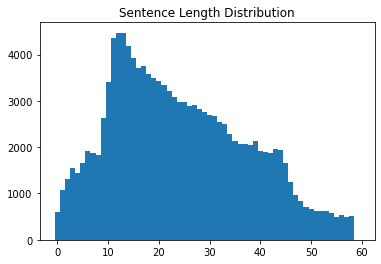

In [19]:
max_len = 60
min_len = 1

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in refined_train_data['document'] if (len(s) < max_len) & (len(s) >= min_len)]
filtered_train_data = refined_train_data[refined_train_data['document'].map(len) < max_len]
filtered_train_data = filtered_train_data[filtered_train_data['document'].map(len) >= min_len]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [20]:
print(refined_train_data.shape)
print(filtered_train_data.shape)
print(len(filtered_corpus))

(149995, 3)
(128937, 3)
128937


In [21]:
filtered_train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


## Step 2. KoNLPy 형태소 분석기 - 네이버 영화리뷰 감정분석 모델

In [32]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [33]:
mecab_corpus[0]

['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리']

In [34]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 42461


In [35]:
mecab_tensor[100]

array([257,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [36]:
mecab_tensor.shape

(128937, 43)

In [37]:
# Case 1 : tokenizer.sequences_to_texts()
mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

['대박']

### 학습데이터, 평가데이터 분리

In [44]:
mecab_tensor[1]

array([ 834,    1,   14,  480,  537,  608,    3,  134,    1,   69, 1598,
         65, 1077,  907,   20,   55,  343,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [45]:
mecab_tokenizer.index_word

{1: '.',
 2: '이',
 3: '영화',
 4: '는',
 5: '다',
 6: '고',
 7: '하',
 8: '의',
 9: '가',
 10: '도',
 11: '은',
 12: '에',
 13: '을',
 14: '..',
 15: '보',
 16: '한',
 17: '!',
 18: '게',
 19: ',',
 20: '지',
 21: '들',
 22: '없',
 23: '?',
 24: '있',
 25: '좋',
 26: '를',
 27: '나',
 28: '었',
 29: '만',
 30: '너무',
 31: '재밌',
 32: '봤',
 33: '는데',
 34: '음',
 35: '정말',
 36: '점',
 37: '아',
 38: '적',
 39: '안',
 40: '네요',
 41: '네',
 42: 'ㅋㅋ',
 43: '진짜',
 44: '최고',
 45: '어',
 46: '로',
 47: '으로',
 48: '~',
 49: '지만',
 50: '했',
 51: '것',
 52: '기',
 53: '같',
 54: '았',
 55: '않',
 56: '어요',
 57: '평점',
 58: '에서',
 59: '거',
 60: '수',
 61: '말',
 62: '면',
 63: '내',
 64: '잘',
 65: '연기',
 66: 'ㅋㅋㅋ',
 67: '되',
 68: '이런',
 69: '...',
 70: '인',
 71: '과',
 72: '주',
 73: '왜',
 74: '1',
 75: '감동',
 76: '던',
 77: '습니다',
 78: '와',
 79: '해',
 80: '싶',
 81: '재미있',
 82: '할',
 83: '스토리',
 84: '잼',
 85: '드라마',
 86: '재미',
 87: '겠',
 88: '더',
 89: '함',
 90: '본',
 91: '지루',
 92: '듯',
 93: '볼',
 94: '재미없',
 95: '아니',
 96: '뭐',
 97: '때',
 98:

In [46]:
mecab_tokenizer.word_index

{'.': 1,
 '이': 2,
 '영화': 3,
 '는': 4,
 '다': 5,
 '고': 6,
 '하': 7,
 '의': 8,
 '가': 9,
 '도': 10,
 '은': 11,
 '에': 12,
 '을': 13,
 '..': 14,
 '보': 15,
 '한': 16,
 '!': 17,
 '게': 18,
 ',': 19,
 '지': 20,
 '들': 21,
 '없': 22,
 '?': 23,
 '있': 24,
 '좋': 25,
 '를': 26,
 '나': 27,
 '었': 28,
 '만': 29,
 '너무': 30,
 '재밌': 31,
 '봤': 32,
 '는데': 33,
 '음': 34,
 '정말': 35,
 '점': 36,
 '아': 37,
 '적': 38,
 '안': 39,
 '네요': 40,
 '네': 41,
 'ㅋㅋ': 42,
 '진짜': 43,
 '최고': 44,
 '어': 45,
 '로': 46,
 '으로': 47,
 '~': 48,
 '지만': 49,
 '했': 50,
 '것': 51,
 '기': 52,
 '같': 53,
 '았': 54,
 '않': 55,
 '어요': 56,
 '평점': 57,
 '에서': 58,
 '거': 59,
 '수': 60,
 '말': 61,
 '면': 62,
 '내': 63,
 '잘': 64,
 '연기': 65,
 'ㅋㅋㅋ': 66,
 '되': 67,
 '이런': 68,
 '...': 69,
 '인': 70,
 '과': 71,
 '주': 72,
 '왜': 73,
 '1': 74,
 '감동': 75,
 '던': 76,
 '습니다': 77,
 '와': 78,
 '해': 79,
 '싶': 80,
 '재미있': 81,
 '할': 82,
 '스토리': 83,
 '잼': 84,
 '드라마': 85,
 '재미': 86,
 '겠': 87,
 '더': 88,
 '함': 89,
 '본': 90,
 '지루': 91,
 '듯': 92,
 '볼': 93,
 '재미없': 94,
 '아니': 95,
 '뭐': 96,
 '때': 97,
 '좀'

In [26]:
filtered_train_data.shape

(128937, 3)

In [27]:
filtered_train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


In [52]:
X_train = mecab_tensor

In [28]:
y_train = filtered_train_data['label']

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(128937, 43)
(128937,)
[ 37  88 965   1   1  43 244  27  40 807   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
0


In [95]:
X_val = X_train[:20000]
y_val = y_train[:20000]

partial_X_train = X_train[20000:100000]
partial_y_train = y_train[20000:100000]
X_test = X_train[100000:]
y_test = y_train[100000:]

print(X_val.shape)
print(y_val.shape)
print(partial_X_train.shape)
print(partial_y_train.shape)
print(X_test.shape)
print(y_test.shape)


(20000, 43)
(20000,)
(80000, 43)
(80000,)
(28937, 43)
(28937,)


### RNN 모델

In [96]:
len(mecab_tokenizer.word_index)

42461

In [97]:
vocab_size = 42462  # 어휘 사전의 크기입니다(10000개의 단어)
word_vector_dim = 512 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)
  
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(64))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_rnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 512)         21740544  
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                147712    
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 21,888,785
Trainable params: 21,888,785
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10 

history = model_rnn.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
157/157 [==============================] - 25s 161ms/step - loss: 0.6921 - accuracy: 0.5293 - val_loss: 0.6330 - val_accuracy: 0.7099
Epoch 2/10
157/157 [==============================] - 25s 158ms/step - loss: 0.4238 - accuracy: 0.8055 - val_loss: 0.6944 - val_accuracy: 0.5016
Epoch 3/10
157/157 [==============================] - 24s 154ms/step - loss: 0.3532 - accuracy: 0.8525 - val_loss: 0.3768 - val_accuracy: 0.8439
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2793 - accuracy: 0.9026 - val_loss: 0.3825 - val_accuracy: 0.8456
Epoch 5/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2418 - accuracy: 0.9203 - val_loss: 0.3847 - val_accuracy: 0.8482
Epoch 6/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2151 - accuracy: 0.9335 - val_loss: 0.3901 - val_accuracy: 0.8416
Epoch 7/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2593 - accuracy: 0.9239 - val_loss: 0.4904 - val_ac

In [99]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


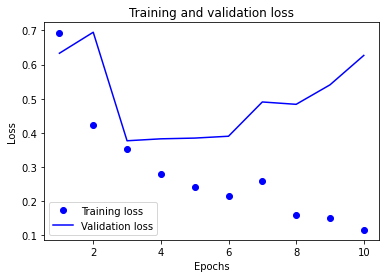

In [100]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

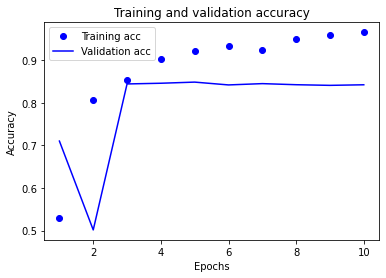

In [101]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [102]:
results = model_rnn.evaluate(X_test,  y_test, verbose=2)

print(results)

905/905 - 2s - loss: 0.6200 - accuracy: 0.8427
[0.6199573874473572, 0.8427273035049438]


## Step 3. SentencePiece - 네이버 영화리뷰 감정분석 모델

In [58]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 40000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 aiffel0035 aiffel0035 1034848 11월  9 17:38 korean_spm.model
-rw-r--r-- 1 aiffel0035 aiffel0035  833358 11월  9 17:38 korean_spm.vocab


In [59]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[7401, 14142, 2709, 32294, 3]
['▁아버지가', '방에', '들어', '가신다', '.']
아버지가방에들어가신다.


In [60]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [61]:
#sp_tokenize(s, corpus) 사용
tensor, word_index, index_word = sp_tokenize(s, filtered_corpus)

In [62]:
tensor.shape

(128937, 38)

In [63]:
sX_train=tensor

In [64]:
sX_val = sX_train[:20000]
y_val = y_train[:20000]

partial_sX_train = sX_train[20000:100000]
partial_y_train = y_train[20000:100000]
sX_test = sX_train[100000:]
y_test = y_train[100000:]

print(sX_val.shape)
print(y_val.shape)
print(partial_sX_train.shape)
print(partial_y_train.shape)
print(sX_test.shape)
print(y_test.shape)

(20000, 38)
(20000,)
(80000, 38)
(80000,)
(28937, 38)
(28937,)


In [65]:
len(word_index)

40000

In [66]:
vocab_size = 40000  # 어휘 사전의 크기입니다(10000개의 단어)
word_vector_dim = 512 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)
  
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(64))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 512)         20480000  
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                147712    
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 20,628,241
Trainable params: 20,628,241
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_rnn.fit(partial_sX_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(sX_val, y_val),
                    verbose=1)

Epoch 1/20
157/157 [==============================] - 23s 143ms/step - loss: 4.2023 - accuracy: 0.4984 - val_loss: 0.6940 - val_accuracy: 0.5019
Epoch 2/20
157/157 [==============================] - 22s 142ms/step - loss: 0.6847 - accuracy: 0.5261 - val_loss: 0.5350 - val_accuracy: 0.7566
Epoch 3/20
157/157 [==============================] - 23s 145ms/step - loss: 0.4351 - accuracy: 0.8194 - val_loss: 0.4698 - val_accuracy: 0.8355
Epoch 4/20
157/157 [==============================] - 24s 153ms/step - loss: 0.2814 - accuracy: 0.8996 - val_loss: 0.3827 - val_accuracy: 0.8414
Epoch 5/20
157/157 [==============================] - 23s 148ms/step - loss: 0.2004 - accuracy: 0.9393 - val_loss: 0.4647 - val_accuracy: 0.8385
Epoch 6/20
157/157 [==============================] - 24s 152ms/step - loss: 0.1401 - accuracy: 0.9619 - val_loss: 0.5055 - val_accuracy: 0.8353
Epoch 7/20
157/157 [==============================] - 23s 149ms/step - loss: 0.2436 - accuracy: 0.9394 - val_loss: 1.0913 - val_ac

In [68]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


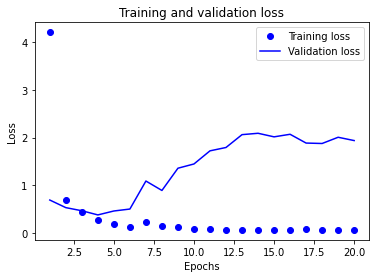

In [69]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

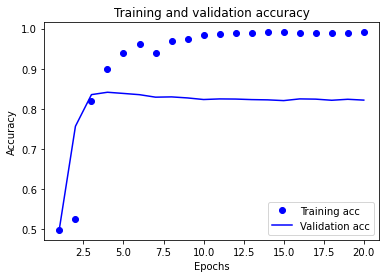

In [70]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [71]:
# 테스트셋을 통한 모델 평가
results = model_rnn.evaluate(sX_test,  y_test, verbose=2)

print(results)

905/905 - 2s - loss: 1.9137 - accuracy: 0.8219
[1.9137455224990845, 0.8219234943389893]


### trial 2

In [82]:
vocab_size = 15000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

tensor, word_index, index_word = sp_tokenize(s, filtered_corpus)
tensor.shape
sX_train=tensor
sX_val = sX_train[:20000]
y_val = y_train[:20000]
partial_sX_train = sX_train[20000:100000]
partial_y_train = y_train[20000:100000]
sX_test = sX_train[100000:]
y_test = y_train[100000:]

In [93]:
word_vector_dim = 128 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)  
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
model_rnn.summary()
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 128)         1920000   
_________________________________________________________________
lstm_14 (LSTM)               (None, 8)                 4384      
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 1,924,465
Trainable params: 1,924,465
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model_rnn.fit(partial_sX_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(sX_val, y_val),
                    verbose=1)

Epoch 1/10
157/157 [==============================] - 3s 19ms/step - loss: 0.7414 - accuracy: 0.5619 - val_loss: 0.6737 - val_accuracy: 0.6112
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 0.4598 - accuracy: 0.7899 - val_loss: 0.3701 - val_accuracy: 0.8465
Epoch 3/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2942 - accuracy: 0.8816 - val_loss: 0.3542 - val_accuracy: 0.8472
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2699 - accuracy: 0.8966 - val_loss: 0.3652 - val_accuracy: 0.8455
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2421 - accuracy: 0.9085 - val_loss: 0.3819 - val_accuracy: 0.8422
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2538 - accuracy: 0.9131 - val_loss: 0.4131 - val_accuracy: 0.8406
Epoch 7/10
157/157 [==============================] - 3s 18ms/step - loss: 0.2031 - accuracy: 0.9253 - val_loss: 0.4557 - val_accuracy: 0.8407

In [95]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


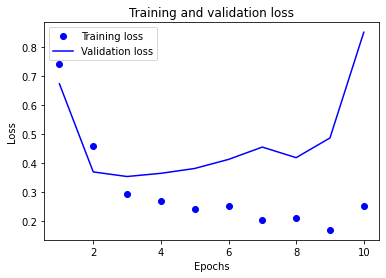

In [96]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

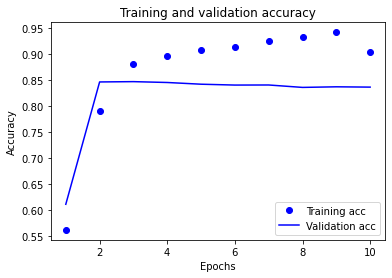

In [97]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [98]:
# 테스트셋을 통한 모델 평가
results = model_rnn.evaluate(sX_test,  y_test, verbose=2)

print(results)

905/905 - 1s - loss: 0.8409 - accuracy: 0.8391
[0.840930163860321, 0.8390641808509827]


Accuracy 비교
- Mecab (vocab_size = 42462) : 0.8427273035049438
- SentencePiece (vocab_size = 40000) : 0.8219234943389893
- SentencePiece (vocab_size = 15000) : 0.8390641808509827
- SentencePiece의 경우, 더 작은 vocab 사이즈로 표현이 가능하기 때문에, Mecab과 동일한 사이즈로 설정해주는 것보다 작은 vocab size로 설정해주는 것이 훨씬 성능이 좋게 나온다. Mecab과 비교했을 때, 성능이 더 좋지 않아서, parameter의 조정이 필요해보인다.